In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib
import numpy as np

In [9]:
all_ratings = pd.DataFrame()

for file in pathlib.Path("../data/03_primary/rating").iterdir():
    df = pd.read_parquet(file)
    all_ratings = pd.concat([all_ratings, df])

all_ratings = all_ratings.dropna(subset=["valence_rating", "arousal_rating"], how="all")
all_ratings = all_ratings[~all_ratings["person_id"].isin(["S01", "S02", "S03", "S04"])]
all_ratings = all_ratings.astype({"valence_rating": float})
all_ratings["arousal_norm"] = np.where(all_ratings["arousal_norm"] > 10, all_ratings["arousal_norm"] / 10, all_ratings["arousal_norm"])

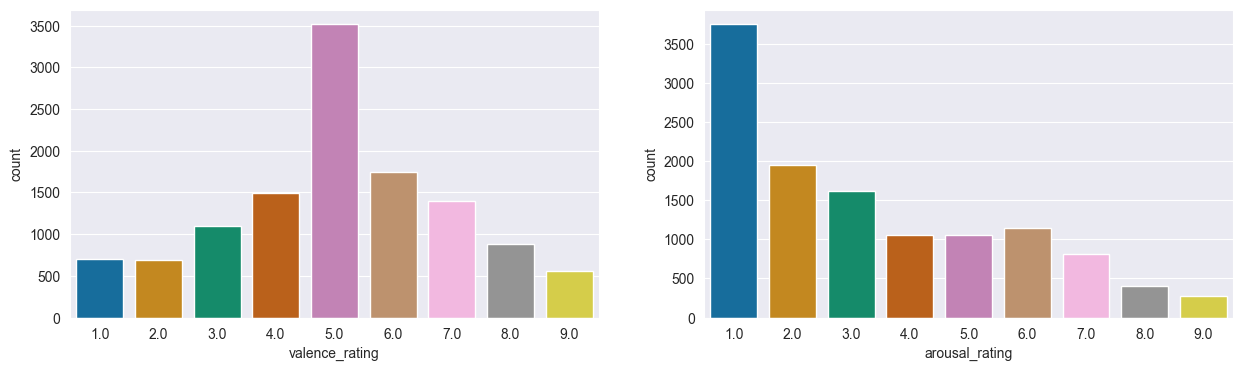

In [10]:
plt.figure(figsize=(15, 4))
plt.subplot(121)
sns.countplot(data=all_ratings, x="valence_rating", palette="colorblind")
plt.subplot(122)
sns.countplot(data=all_ratings, x="arousal_rating", palette="colorblind")
plt.show()

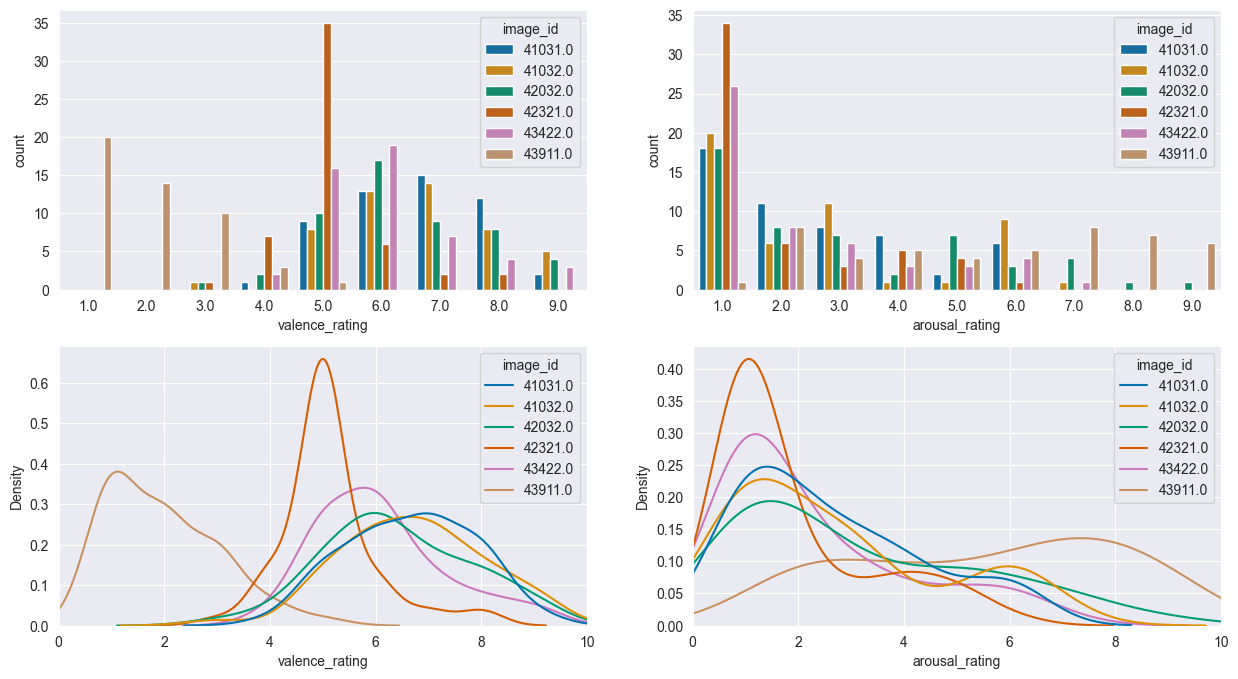

In [20]:
image_lst = all_ratings["image_id"].sample(10, random_state=42).unique().tolist()[:6]
few_ratings = all_ratings[all_ratings["image_id"].isin(image_lst)]

plt.figure(figsize=(15, 8))
plt.subplot(221)
sns.countplot(data=few_ratings, x="valence_rating", hue="image_id", palette="colorblind")
plt.subplot(222)
sns.countplot(data=few_ratings, x="arousal_rating", hue="image_id", palette="colorblind")
plt.subplot(223)
sns.kdeplot(data=few_ratings, x="valence_rating", hue="image_id", common_norm=False, palette="colorblind")
plt.xlim([0, 10])
plt.subplot(224)
sns.kdeplot(data=few_ratings, x="arousal_rating", hue="image_id", common_norm=False, palette="colorblind")
plt.xlim([0, 10])
plt.show()

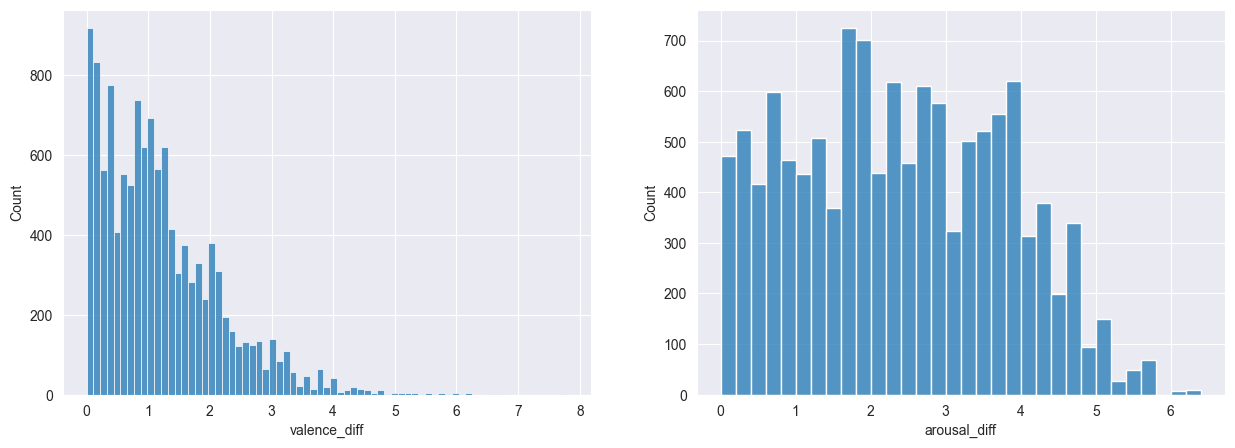

In [12]:
all_ratings["valence_diff"] = (all_ratings["valence_norm"] - all_ratings["valence_rating"]).abs()
all_ratings["arousal_diff"] = (all_ratings["arousal_norm"] - all_ratings["arousal_rating"]).abs()

plt.figure(figsize=(15, 5))
plt.subplot(121)
sns.histplot(data=all_ratings, x="valence_diff")
plt.subplot(122)
sns.histplot(data=all_ratings, x="arousal_diff")
plt.show()

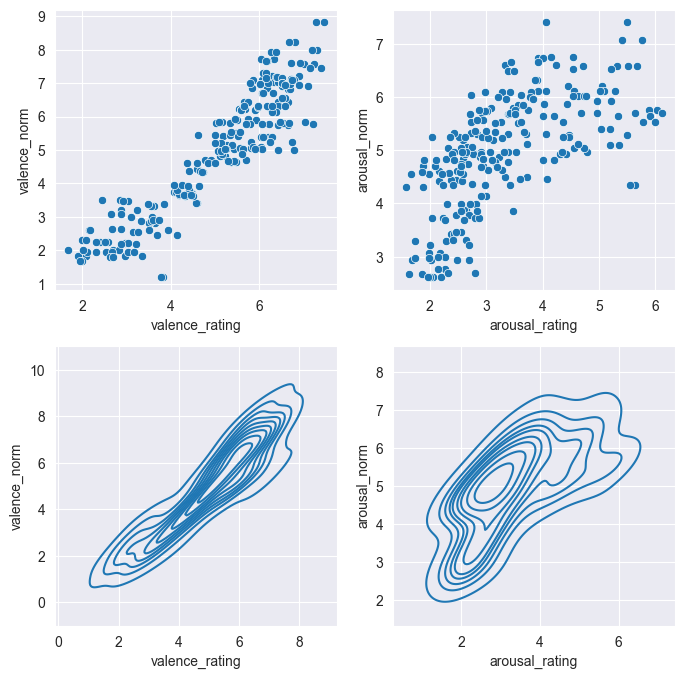

In [13]:
grouped_mean = all_ratings.groupby("image_id").mean(numeric_only=True).reset_index()

plt.figure(figsize=(8, 8))
plt.subplot(221)
sns.scatterplot(data=grouped_mean, x="valence_rating", y="valence_norm")
plt.subplot(222)
sns.scatterplot(data=grouped_mean, x="arousal_rating", y="arousal_norm")
plt.subplot(223)
sns.kdeplot(data=grouped_mean, x="valence_rating", y="valence_norm")
plt.subplot(224)
sns.kdeplot(data=grouped_mean, x="arousal_rating", y="arousal_norm")
plt.show()